In [1]:
import seaborn as sns
import pandas as pd
import operator 
import time 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
tm = pd.read_csv('../data/teis_monthly.csv')

In [3]:
referrals = tm[['POE', 'IFSP Count', 'DOB','Notification/ Referral Date','Eligibility Count']].fillna(0)
referrals

,POE,IFSP Count,DOB,Notification/ Referral Date,Eligibility Count
0,ET,0.0,8/9/2014,7/1/2016,1.0
1,FT,0.0,7/31/2013,7/1/2016,0.0
2,FT,0.0,2/5/2016,7/1/2016,1.0
3,FT,1.0,12/6/2015,7/1/2016,1.0
4,FT,1.0,4/18/2015,7/1/2016,1.0
...,...,...,...,...,...
113251,UC,0.0,4/7/2021,5/16/2022,0.0
113252,UC,1.0,3/13/2022,5/11/2022,1.0
113253,UC,0.0,1/5/2022,5/10/2022,1.0
113254,UC,1.0,9/12/2020,5/6/2022,1.0


In [4]:
tm.groupby(['POE']).sum('Referral Count')

,Child ID,Referral Count,Evaluation Count,Eligibility Count,IFSP Count,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,Late Referral,Qtr
POE,,,,,,,,,,,,
ET,9331895762,20226,11555.0,9252.0,1745.0,20226,40826697,20226,0.0,0.0,442.0,50645
FT,5109212525,11143,5769.0,4118.0,801.0,11143,22491151,11143,0.0,0.0,264.0,27723
GN,9278121213,19956,8614.0,5908.0,951.0,19956,40284548,19956,0.0,0.0,495.0,49894
MD,7990762966,17261,8144.0,4710.0,702.0,17261,34842924,17261,0.0,0.0,471.0,43094
NW,3005140975,6506,3435.0,2759.0,459.0,6506,13132779,6506,0.0,0.0,166.0,16182
SC,6764605231,14532,7706.0,3933.0,947.0,14532,29335292,14532,0.0,0.0,354.0,36700
SE,4001088525,8575,5456.0,3342.0,503.0,8575,17310592,8575,0.0,0.0,212.0,21482
SW,2780802508,6034,3363.0,2766.0,531.0,6034,12179616,6034,0.0,0.0,184.0,14999
UC,4196354849,9023,5427.0,3974.0,1371.0,9023,18214307,9023,0.0,0.0,241.0,22750


In [5]:
tm['Notification/ Referral Date'] = pd.to_datetime(tm['Notification/ Referral Date'])
tm['Notification/ Referral Date']

0        2016-07-01
1        2016-07-01
2        2016-07-01
3        2016-07-01
4        2016-07-01
            ...    
113251   2022-05-16
113252   2022-05-11
113253   2022-05-10
113254   2022-05-06
113255   2022-05-11
Name: Notification/ Referral Date, Length: 113256, dtype: datetime64[ns]

In [6]:
tm['DOB'] = pd.to_datetime(tm['DOB'])
tm['DOB']

0        2014-08-09
1        2013-07-31
2        2016-02-05
3        2015-12-06
4        2015-04-18
            ...    
113251   2021-04-07
113252   2022-03-13
113253   2022-01-05
113254   2020-09-12
113255   2022-02-08
Name: DOB, Length: 113256, dtype: datetime64[ns]

In [7]:
tm_referral = tm[['Referral Source Type Name', 'IFSP Count']].fillna(0)
tm_referral.head(5)

,Referral Source Type Name,IFSP Count
0,Foster Parent,0.0
1,DCS,0.0
2,DCS,0.0
3,PCP,1.0
4,Parent,1.0


In [8]:
tm_poe = tm[['POE', 'Eligibility Count', 'IFSP Count','DOB', 'Notification/ Referral Date']].fillna(0)

In [9]:
tm_poe['Avg_Age'] = (tm['Notification/ Referral Date'] - tm['DOB'])
tm_poe['Avg_Age'] = tm_poe['Avg_Age'].dt.days.astype(int)
tm_poe

,POE,Eligibility Count,IFSP Count,DOB,Notification/ Referral Date,Avg_Age
0,ET,1.0,0.0,2014-08-09,2016-07-01,692
1,FT,0.0,0.0,2013-07-31,2016-07-01,1066
2,FT,1.0,0.0,2016-02-05,2016-07-01,147
3,FT,1.0,1.0,2015-12-06,2016-07-01,208
4,FT,1.0,1.0,2015-04-18,2016-07-01,440
...,...,...,...,...,...,...
113251,UC,0.0,0.0,2021-04-07,2022-05-16,404
113252,UC,1.0,1.0,2022-03-13,2022-05-11,59
113253,UC,1.0,0.0,2022-01-05,2022-05-10,125
113254,UC,1.0,1.0,2020-09-12,2022-05-06,601


In [27]:
tm_age_info = tm_poe.groupby('POE')['Avg_Age'].agg(['mean','median','min','max']).round(decimals = 0)
tm_age_info

,mean,median,min,max
POE,,,,
ET,451.0,474.0,0,1233
FT,425.0,433.0,0,3896
GN,501.0,554.0,0,3850
MD,468.0,497.0,0,1096
NW,428.0,428.0,0,1468
SC,519.0,564.0,0,1180
SE,436.0,446.0,1,1387
SW,437.0,450.0,1,1095
UC,473.0,515.0,0,1365


In [11]:
tm_poe_success = tm_poe[['POE','IFSP Count','Eligibility Count']].groupby('POE').sum()
tm_poe_success

,IFSP Count,Eligibility Count
POE,,
ET,1745.0,9252.0
FT,801.0,4118.0
GN,951.0,5908.0
MD,702.0,4710.0
NW,459.0,2759.0
SC,947.0,3933.0
SE,503.0,3342.0
SW,531.0,2766.0
UC,1371.0,3974.0


In [12]:
tm_poe_success['Eligibility Success']= (tm_poe_success['IFSP Count']/tm_poe_success['Eligibility Count']*100).round(decimals = 2)
tm_poe_success

,IFSP Count,Eligibility Count,Eligibility Success
POE,,,
ET,1745.0,9252.0,18.86
FT,801.0,4118.0,19.45
GN,951.0,5908.0,16.10
MD,702.0,4710.0,14.90
NW,459.0,2759.0,16.64
SC,947.0,3933.0,24.08
SE,503.0,3342.0,15.05
SW,531.0,2766.0,19.20
UC,1371.0,3974.0,34.50


In [13]:
dob = tm['Notification/ Referral Date'] - tm['DOB']
dob

0         692 days
1        1066 days
2         147 days
3         208 days
4         440 days
            ...   
113251    404 days
113252     59 days
113253    125 days
113254    601 days
113255     92 days
Length: 113256, dtype: timedelta64[ns]

In [14]:
dob_mean = dob.mean()

In [15]:
dob_mean.days

467

In [16]:
(tm_poe['IFSP Count'].sum()/tm_poe['IFSP Count'].count())*100

7.07247298156389

In [17]:
tm_poe['IFSP Count'].head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: IFSP Count, dtype: float64

In [64]:
tm_poe_rr = ((tm_poe.groupby('POE')['IFSP Count'].sum()/tm_poe.groupby('POE')['IFSP Count'].count())*100).to_frame()
tm_poe_rr.rename(columns = {'IFSP Count': 'IFSP Rate'}, inplace = True )
tm_poe_rr


,IFSP Rate
POE,
ET,8.627509
FT,7.188369
GN,4.765484
MD,4.066972
NW,7.055026
SC,6.516653
SE,5.865889
SW,8.800133
UC,15.194503


*Each POE divided by total count of IFSPs times 100 to give percentage* 

In [90]:
tm_ifsp_percentage = ((tm.groupby('POE')['IFSP Count'].sum()/tm['IFSP Count'].sum())*100).round(decimals = 2).to_frame()
tm_ifsp_percentage.rename(columns = {'IFSP Count': 'IFSP Percentage'}, inplace = True )
tm_ifsp_percentage

,IFSP Percentage
POE,
ET,21.79
FT,10.00
GN,11.87
MD,8.76
NW,5.73
SC,11.82
SE,6.28
SW,6.63
UC,17.12


In [24]:
TEIS_Merge1 = pd.merge(tm_poe_success, tm_poe_rr, on =['POE'], how = 'inner')
TEIS_Merge1

,IFSP Count,Eligibility Count,Eligibility Success,IFSP Rate
POE,,,,
ET,1745.0,9252.0,18.86,8.627509
FT,801.0,4118.0,19.45,7.188369
GN,951.0,5908.0,16.10,4.765484
MD,702.0,4710.0,14.90,4.066972
NW,459.0,2759.0,16.64,7.055026
SC,947.0,3933.0,24.08,6.516653
SE,503.0,3342.0,15.05,5.865889
SW,531.0,2766.0,19.20,8.800133
UC,1371.0,3974.0,34.50,15.194503


In [28]:
TEIS_All = pd.merge(TEIS_Merge1, tm_age_info, on = ['POE'], how = 'inner')
TEIS_All

,IFSP Count,Eligibility Count,Eligibility Success,IFSP Rate,mean,median,min,max
POE,,,,,,,,
ET,1745.0,9252.0,18.86,8.627509,451.0,474.0,0,1233
FT,801.0,4118.0,19.45,7.188369,425.0,433.0,0,3896
GN,951.0,5908.0,16.10,4.765484,501.0,554.0,0,3850
MD,702.0,4710.0,14.90,4.066972,468.0,497.0,0,1096
NW,459.0,2759.0,16.64,7.055026,428.0,428.0,0,1468
SC,947.0,3933.0,24.08,6.516653,519.0,564.0,0,1180
SE,503.0,3342.0,15.05,5.865889,436.0,446.0,1,1387
SW,531.0,2766.0,19.20,8.800133,437.0,450.0,1,1095
UC,1371.0,3974.0,34.50,15.194503,473.0,515.0,0,1365


In [33]:
tm_age_info2 = ((tm_poe.groupby('POE')['Avg_Age'].agg(['mean','median','min','max']))/ 30.4167).round(decimals = 0)
tm_age_info2

,mean,median,min,max
POE,,,,
ET,15.0,16.0,0.0,41.0
FT,14.0,14.0,0.0,128.0
GN,16.0,18.0,0.0,127.0
MD,15.0,16.0,0.0,36.0
NW,14.0,14.0,0.0,48.0
SC,17.0,19.0,0.0,39.0
SE,14.0,15.0,0.0,46.0
SW,14.0,15.0,0.0,36.0
UC,16.0,17.0,0.0,45.0


To get the eligibility success rate we totaled the IFSP and Eligibility and divided them then times them by 100 to get the percentage. 

In [55]:
TEIS_All2 = pd.merge(TEIS_Merge1, tm_age_info2, on = ['POE'], how = 'inner')
TEIS_All2

,IFSP Count,Eligibility Count,Eligibility Success,IFSP Rate,mean,median,min,max
POE,,,,,,,,
ET,1745.0,9252.0,18.86,8.627509,15.0,16.0,0.0,41.0
FT,801.0,4118.0,19.45,7.188369,14.0,14.0,0.0,128.0
GN,951.0,5908.0,16.10,4.765484,16.0,18.0,0.0,127.0
MD,702.0,4710.0,14.90,4.066972,15.0,16.0,0.0,36.0
NW,459.0,2759.0,16.64,7.055026,14.0,14.0,0.0,48.0
SC,947.0,3933.0,24.08,6.516653,17.0,19.0,0.0,39.0
SE,503.0,3342.0,15.05,5.865889,14.0,15.0,0.0,46.0
SW,531.0,2766.0,19.20,8.800133,14.0,15.0,0.0,36.0
UC,1371.0,3974.0,34.50,15.194503,16.0,17.0,0.0,45.0


In [91]:
TEIS_All3 = pd.merge(TEIS_All2, tm_ifsp_percentage, on = ['POE'], how = 'inner').reset_index()
TEIS_All3

,POE,IFSP Count,Eligibility Count,Eligibility Success,IFSP Rate,mean,median,min,max,IFSP Percentage
0,ET,1745.0,9252.0,18.86,8.627509,15.0,16.0,0.0,41.0,21.79
1,FT,801.0,4118.0,19.45,7.188369,14.0,14.0,0.0,128.0,10.00
2,GN,951.0,5908.0,16.10,4.765484,16.0,18.0,0.0,127.0,11.87
3,MD,702.0,4710.0,14.90,4.066972,15.0,16.0,0.0,36.0,8.76
4,NW,459.0,2759.0,16.64,7.055026,14.0,14.0,0.0,48.0,5.73
5,SC,947.0,3933.0,24.08,6.516653,17.0,19.0,0.0,39.0,11.82
6,SE,503.0,3342.0,15.05,5.865889,14.0,15.0,0.0,46.0,6.28
7,SW,531.0,2766.0,19.20,8.800133,14.0,15.0,0.0,36.0,6.63
8,UC,1371.0,3974.0,34.50,15.194503,16.0,17.0,0.0,45.0,17.12


In [72]:
tm_ifsp_percentage['IFSP Percentage'] = tm_ifsp_percentage['IFSP Percentage'].astype(int)

([<matplotlib.patches.Wedge at 0x1af8d37fa90>,
 [Text(0.8452412215956503, 0.7039653949701599, ''),
  Text(-0.1630900162354379, 1.0878426570990516, ''),
  Text(-0.8215036275663798, 0.7315270260867188, ''),
  Text(-1.0945911942490776, 0.10895006871213182, ''),
  Text(-1.0403989566305283, -0.35716944304084625, ''),
  Text(-0.7178443167299124, -0.8334863747767959, ''),
  Text(-0.16308999077264305, -1.0878426609164487, ''),
  Text(0.27003405030511296, -1.0663402888739673, ''),
  Text(0.9307047944209487, -0.5863348750005067, '')])

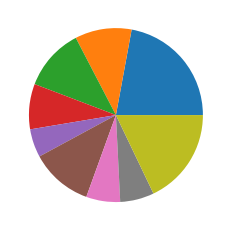

In [89]:


plt.pie(TEIS_All3['IFSP Percentage'])